In [24]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

In [1]:
import cv2
import matplotlib.pyplot as plt

D:\anaconda\envs\ML_class\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\envs\ML_class\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\anaconda\envs\ML_class\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import cv2
img = cv2.imread("husky.jpg")
img

array([[[213, 205, 205],
        [213, 205, 205],
        [213, 205, 205],
        ...,
        [186, 184, 176],
        [133, 134, 125],
        [125, 126, 117]],

       [[213, 205, 205],
        [213, 205, 205],
        [213, 205, 205],
        ...,
        [194, 192, 184],
        [159, 160, 151],
        [112, 113, 104]],

       [[212, 205, 202],
        [212, 205, 202],
        [212, 205, 202],
        ...,
        [189, 187, 179],
        [207, 208, 199],
        [176, 177, 168]],

       ...,

       [[ 65, 103,  85],
        [ 60,  98,  80],
        [ 64,  98,  81],
        ...,
        [ 68, 103,  83],
        [ 80, 112,  93],
        [ 68, 100,  81]],

       [[ 60, 101,  80],
        [ 46,  83,  63],
        [ 58,  90,  73],
        ...,
        [ 69, 105,  88],
        [ 73, 106,  91],
        [ 84, 117, 102]],

       [[ 68, 109,  88],
        [ 40,  77,  57],
        [ 54,  83,  67],
        ...,
        [ 68, 106,  88],
        [ 73, 106,  92],
        [ 84, 117, 103]]

In [3]:
img=img/255.0
img

array([[[0.83529412, 0.80392157, 0.80392157],
        [0.83529412, 0.80392157, 0.80392157],
        [0.83529412, 0.80392157, 0.80392157],
        ...,
        [0.72941176, 0.72156863, 0.69019608],
        [0.52156863, 0.5254902 , 0.49019608],
        [0.49019608, 0.49411765, 0.45882353]],

       [[0.83529412, 0.80392157, 0.80392157],
        [0.83529412, 0.80392157, 0.80392157],
        [0.83529412, 0.80392157, 0.80392157],
        ...,
        [0.76078431, 0.75294118, 0.72156863],
        [0.62352941, 0.62745098, 0.59215686],
        [0.43921569, 0.44313725, 0.40784314]],

       [[0.83137255, 0.80392157, 0.79215686],
        [0.83137255, 0.80392157, 0.79215686],
        [0.83137255, 0.80392157, 0.79215686],
        ...,
        [0.74117647, 0.73333333, 0.70196078],
        [0.81176471, 0.81568627, 0.78039216],
        [0.69019608, 0.69411765, 0.65882353]],

       ...,

       [[0.25490196, 0.40392157, 0.33333333],
        [0.23529412, 0.38431373, 0.31372549],
        [0.25098039, 0

image shape: (210, 240, 3)
data type: uint8
min: 4, max: 255


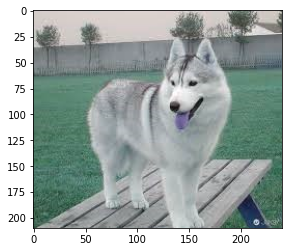

In [15]:
print(f"image shape: {img.shape}")
print(f"data type: {img.dtype}")
print(f"min: {img.min()}, max: {img.max()}")
plt.imshow(img)
plt.show()

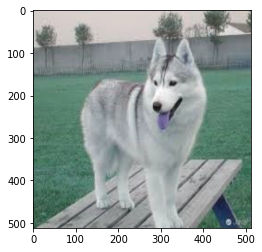

In [16]:
img=cv2.resize(img,(512,512))
plt.imshow(img)

Text(0, 0.5, 'Frequency')

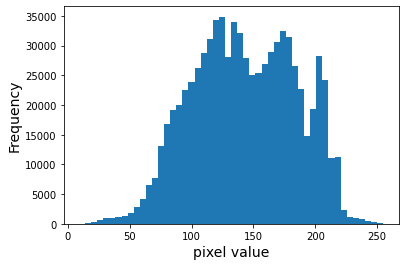

In [19]:
plt.hist(img.reshape(-1), bins=50)
plt.xlabel("pixel value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

In [14]:
print(img.shape)

(210, 240, 3)


## Image preprocessing

In [25]:
train_list=pd.read_csv('train.csv')

In [26]:
data_path = "../AOI/train_images"

In [27]:
os.listdir(data_path)[:5]

['.ipynb_checkpoints',
 'train_00000.png',
 'train_00001.png',
 'train_00002.png',
 'train_00003.png']

In [28]:
img = cv2.imread(os.path.join(data_path, train_list.loc[0, "ID"]))

image shape: (512, 512, 3)
data type: uint8
min: 109, max: 255


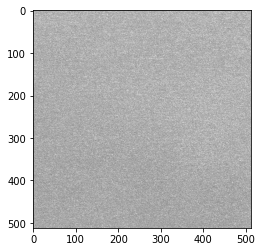

In [29]:
print(f"image shape: {img.shape}")
print(f"data type: {img.dtype}")
print(f"min: {img.min()}, max: {img.max()}")
plt.imshow(img)
plt.show()

In [30]:
normal_list = train_list[train_list["Label"]==0]["ID"].values
void_list = train_list[train_list["Label"]==1]["ID"].values
horizontal_defect_list = train_list[train_list["Label"]==2]["ID"].values
vertical_defect_list = train_list[train_list["Label"]==3]["ID"].values
edge_defect_list = train_list[train_list["Label"]==4]["ID"].values
particle_list = train_list[train_list["Label"]==5]["ID"].values

In [31]:
label=[normal_list,void_list,horizontal_defect_list,vertical_defect_list,edge_defect_list,particle_list]

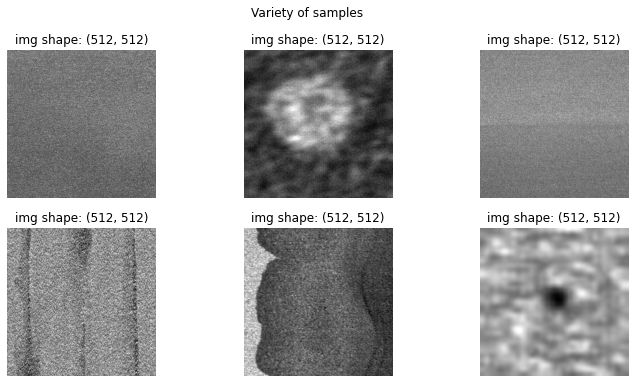

In [32]:
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    img = cv2.imread(os.path.join(data_path, label[i][i]),0)
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.title(f"img shape: {img.shape}")
plt.suptitle(f"Variety of samples", fontsize=12)
plt.show()

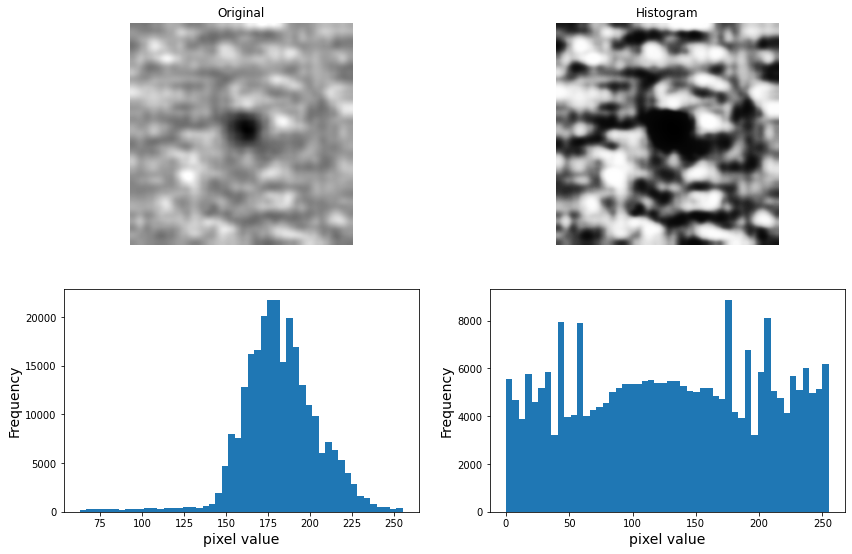

In [33]:
#Histogram Equalization
equalize_img = cv2.equalizeHist(img)

plt.figure(figsize=(14, 9))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title(f"Original")

plt.subplot(2, 2, 2)
plt.imshow(equalize_img, cmap="gray")
plt.axis("off")
plt.title(f"Histogram")

plt.subplot(2, 2, 3)
plt.hist(img.reshape(-1), bins=50)
plt.xlabel("pixel value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.subplot(2, 2, 4)
plt.hist(equalize_img.reshape(-1), bins=50)
plt.xlabel("pixel value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()


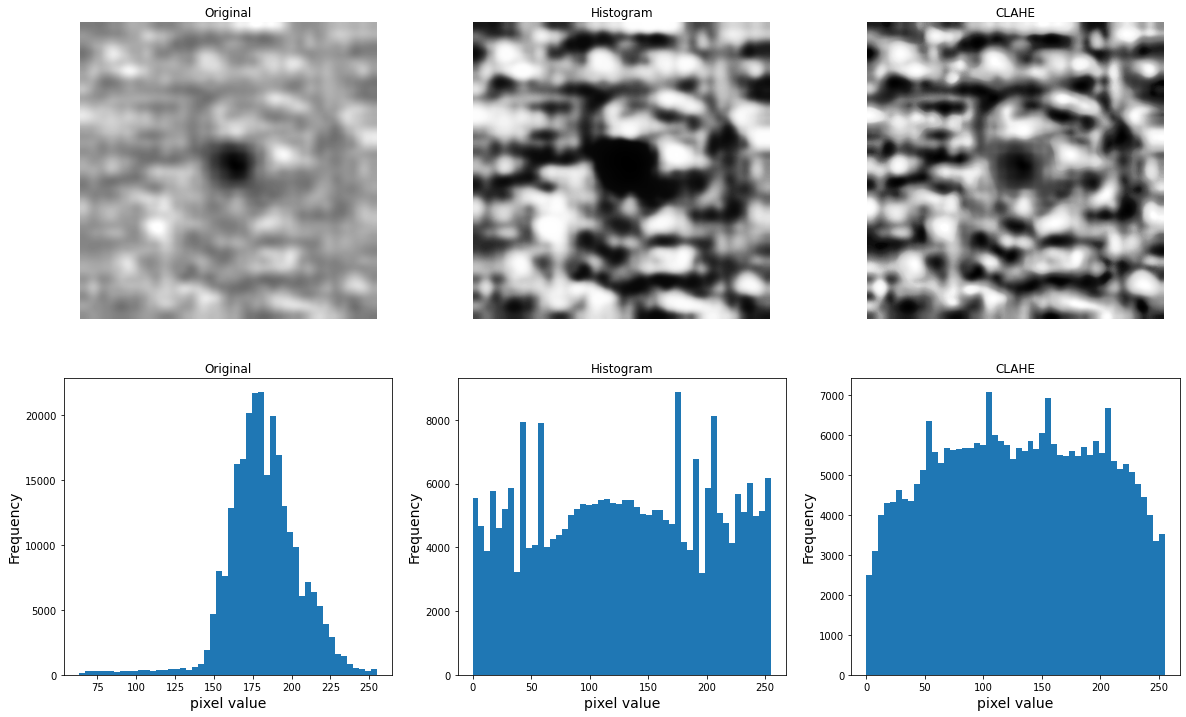

In [34]:
clahe = cv2.createCLAHE()
clahe_img = clahe.apply(img)

plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title(f"Original")

plt.subplot(2, 3, 2)
plt.imshow(equalize_img, cmap="gray")
plt.axis("off")
plt.title(f"Histogram")

plt.subplot(2, 3, 3)
plt.imshow(clahe_img, cmap="gray")
plt.axis("off")
plt.title(f"CLAHE")

plt.subplot(2, 3, 4)
plt.hist(img.reshape(-1), bins=50)
plt.xlabel("pixel value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title(f"Original")

plt.subplot(2, 3, 5)
plt.hist(equalize_img.reshape(-1), bins=50)
plt.xlabel("pixel value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title(f"Histogram")

plt.subplot(2, 3, 6)
plt.hist(clahe_img.reshape(-1), bins=50)
plt.xlabel("pixel value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title(f"CLAHE")
plt.show()

## Split Data

In [19]:
train_list.shape

(2528, 2)

D:\anaconda\envs\ML_class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

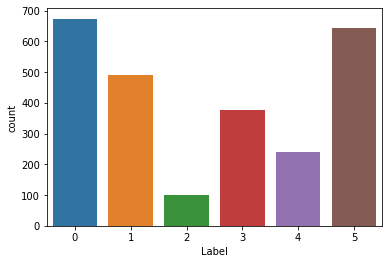

In [20]:
train_list["Label"].value_counts()
sns.countplot('Label', data=train_list)

In [21]:
from sklearn.model_selection import train_test_split
id=train_list["ID"]
target=train_list["Label"]
x_train,x_test,y_train,y_test= train_test_split(id,target,test_size=0.2,random_state=666)

In [22]:
x_train.shape, x_test.shape

((2022,), (506,))

## Data Imbalance

In [23]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [24]:
unique, counts = np.unique(y_train.values, return_counts=True)
print("unique ", unique)
print("counts: ", counts)

unique  [0 1 2 3 4 5]
counts:  [542 396  80 306 191 507]


In [25]:
#adjust weight
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced',unique,y_train)
print(class_weights)

[0.62177122 0.8510101  4.2125     1.10130719 1.76439791 0.66469428]


D:\anaconda\envs\ML_class\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0 1 2 3 4 5], y=2341    5
1943    4
1355    5
44      5
719     3
       ..
1993    0
70      5
1950    1
1922    0
2284    0
Name: Label, Length: 2022, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [26]:
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [27]:
from tensorflow.keras.applications.efficientnet import (EfficientNetB5, preprocess_input)

In [28]:
num_classes = y_train.unique().shape[0]
num_classes

6

In [29]:
img_shape = (456, 456)
batch_size = 32

In [30]:
def num_steps_per_epoch(data_generator, batch_size):
    if data_generator.n % batch_size==0:
        return data_generator.n//batch_size
    else:
        return data_generator.n//batch_size + 1

In [31]:
pre_model = EfficientNetB5(weights='imagenet', input_shape=(img_shape[0], img_shape[1], 3), include_top=False)

x = layers.GlobalAveragePooling2D()(pre_model.output)
# x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(num_classes, activation="softmax")(x)

In [32]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [77]:
model = tf.keras.models.Model(inputs=pre_model.inputs, outputs=outputs)

In [78]:
model_dir = './model-logs'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)


modelfiles = model_dir + '/{}-best-model.h5'.format('efficientnet')
model_mckp = callbacks.ModelCheckpoint(modelfiles,
                     monitor='val_accuracy',
                     save_best_only=True)

earlystop = callbacks.EarlyStopping(monitor='val_loss',
                    patience=3,
                    verbose=1)


callbacks_list = [model_mckp, earlystop]

In [89]:
train=pd.concat([x_train,y_train],axis=1)
train.reset_index(drop=True,inplace=True)
train

,ID,Label
0,train_02341.png,5
1,train_01943.png,4
2,train_01355.png,5
3,train_00044.png,5
4,train_00719.png,3
...,...,...
2017,train_01993.png,0
2018,train_00070.png,5
2019,train_01950.png,1
2020,train_01922.png,0


In [110]:
train["Label"]=train["Label"].astype("str")

In [111]:
train["Label"].dtype

dtype('O')

In [112]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                                    rotation_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False,
                                    width_shift_range=0.05,
                                    height_shift_range=0.05,
                                    preprocessing_function=preprocess_input
                                   )

In [113]:
train_generator = train_datagen.flow_from_dataframe(
                                                      dataframe=train,
                                                      directory=data_path,
                                                      x_col="ID",
                                                      y_col="Label",
                                                      target_size=img_shape,
                                                      batch_size=batch_size,
                                                      class_mode='categorical')

Found 2022 validated image filenames belonging to 6 classes.


In [114]:
lr = 1e-4
num_epochs = 10

train_steps = num_steps_per_epoch(train_generator, batch_size)

In [115]:
optimizer = tf.keras.optimizers.Adam(lr)
model.compile(loss="categorical_crossentropy", 
              optimizer=optimizer, 
              metrics=["accuracy"])

In [116]:
class_weights = {i:value for i, value in enumerate(class_weights)}

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=train_steps,
                              epochs=2,
                              validation_data=valid_generator,
                              validation_steps=valid_steps,
                              class_weight=class_weights,
                              callbacks=callbacks_list)

In [ ]:
model_path = model_dir + '/{}-last-model-satge1.h5'.format('efficientnet')
model.save(model_path)